In [1]:
import pandas as pd

import config

import numpy as np
from scipy.stats import linregress
from scipy.spatial import distance
from scipy import stats
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_colwidth', 100) 

#set up helper variables and functions:
CFG = config.Config()

In [2]:
#load data:
dataset_claim_embeds = pd.read_parquet(f'{CFG.report_dir}/pubsphere.claim_embed.parquet')
YT_claim_embeds = pd.read_parquet(f'{CFG.report_dir}/pubsphere_YT_posts.parquet')
YT_claim_embeds_exp_explode = pd.read_parquet(f'{CFG.report_dir}/pubsphere_YT_post_claim_exp_explode.parquet')
YT_claim_embeds_explode = pd.read_parquet(f'{CFG.report_dir}/pubsphere_YT_post_claim_explode.parquet')
YTdebatethreads = pd.read_parquet(f'{CFG.report_dir}/pubsphere_YT_debate_threads.parquet')

In [13]:
YT_claim_embeds.columns.to_list()

['StartDate',
 'RecordedDate',
 'IPAddress',
 'Finished',
 'Coder',
 'ID',
 'Mark_ID',
 'Genre',
 'topiccode',
 'Platform',
 'Anonymity',
 'Anonymity_9_TEXT',
 'codable',
 'Interaction',
 'Acknowledgement',
 'TopicRelevance',
 'Reasoning',
 'BackgroundInfo',
 'ExternalEvidence',
 'ExternalEvidence_1_TEXT',
 'Opinion',
 'disagreement',
 'Ideologicaldirection',
 'Name_calling',
 'Vulgarity',
 'Attack_reputation',
 'Question_Intelligenc',
 'All_caps_function',
 'Sarcasm_to_criticize',
 'Individual_right',
 'discrimination',
 'Invoke_violence',
 'Tone',
 'INTERACTIVITY_DUMMY',
 'RATIONALITY_DUMMY',
 'HAS_OPINION_DUMMY',
 'LIBERAL_NEUTRAL_CONSERVATIVE',
 'LIBERAL_DUMMY',
 'CONSERVATIVE_DUMMY',
 'NAMECALLING_DUMMY',
 'VULGAR_DUMMY',
 'NAMECALLING_VULGAR_DUMMY',
 'INCIVILITY_ORDINAL',
 'INCIVILITY_DUMMY',
 'INTOLERANCE_DUMMY',
 'filter_$',
 'IMPOLITENESS_DUMMY',
 'commentText',
 'showName',
 'genre',
 'Time_comment',
 'likeCount_comment',
 'entities',
 'place',
 'retweet_count',
 'platform',


In [22]:
YT_claim_embeds.loc[:, ['videoTitle',"commentText", "post_expansion_gpt4o", 'claims_gpt4o', 'claims_ext_gpt4o']].iloc[10:20]

,videoTitle,commentText,post_expansion_gpt4o,claims_gpt4o,claims_ext_gpt4o
2815,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,King Kong well it's the amount sanctions you put on them.,"King Kong, well, it's the amount of sanctions you put on Syria that affects the situation.","[""Sanctions have been placed on them.""]","[""Sanctions on Syria affect the situation""]"
886,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Thanks for the Liberal Slant. CBS.,Thanks for the Liberal Slant. CBS.,"[""CBS has a liberal slant""]","[""CBS has a liberal slant""]"
2907,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Tristen Soodeen please stop listening to the news,"Tristen Soodeen, please stop listening to the news about the Syrian crisis and the complex inter...",[],[]
2069,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,why must war??,"why must war be a constant issue, especially with the complex alliances and conflicts in the Syr...",[],"[""war is a constant issue"", ""there are complex alliances and conflicts in the Syrian crisis""]"
1610,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","Do you know how many children the USA have murdered in Iraq, Afghanistan, Libya, Syria, Vietnam ...","Do you know how many children the USA have murdered in Iraq, Afghanistan, Libya, Syria, Vietnam?...","[""The USA has murdered around 2 million children in Iraq, Afghanistan, Libya, Syria, and Vietnam...","[""The USA has murdered children in Iraq, Afghanistan, Libya, Syria, and Vietnam"", ""Conservative ..."
1639,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","That is the white helmets job, to drop the chemical bottles at the same place of the Assad's air...","That is the white helmets job, to drop the chemical bottles at the same place of the Assad's air...","[""The white helmets drop chemical bottles at the site of Assad's air strikes""]","[""The white helmets drop chemical bottles at the site of Assad's air strikes""]"
1954,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","This is nothing like Irak, because the allied forces only targeted chemical plant, and there is ...","This situation is nothing like Iraq, because the allied forces only targeted the chemical plant,...","[""The allied forces only targeted a chemical plant"", ""There is no sign of intervention in the ci...","[""This situation is nothing like Iraq"", ""The allied forces only targeted the chemical plant"", ""T..."
2520,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Helly looks more insane than Killary and boy that language of hate she has,Helly looks more insane than Killary and boy that language of hate she has,"[""Helly looks more insane than Killary"", ""Helly has a language of hate""]","[""Helly looks more insane than Killary"", ""Helly has a language of hate""]"
1919,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Mr. stevieplier i see you face when strike bomb you home,Mr. stevieplier i see you face when strike bomb you home,[],[]
1015,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,America will pay for its sin's,"America will pay for its sins for the actions it has taken in countries like Iraq, Afghanistan, ...","[""America will pay for its sins""]","[""America will pay for its sins for its actions in various countries"", ""Around 2 million childre..."


In [24]:
YT_claim_embeds.columns.to_list()

['StartDate',
 'RecordedDate',
 'IPAddress',
 'Finished',
 'Coder',
 'ID',
 'Mark_ID',
 'Genre',
 'topiccode',
 'Platform',
 'Anonymity',
 'Anonymity_9_TEXT',
 'codable',
 'Interaction',
 'Acknowledgement',
 'TopicRelevance',
 'Reasoning',
 'BackgroundInfo',
 'ExternalEvidence',
 'ExternalEvidence_1_TEXT',
 'Opinion',
 'disagreement',
 'Ideologicaldirection',
 'Name_calling',
 'Vulgarity',
 'Attack_reputation',
 'Question_Intelligenc',
 'All_caps_function',
 'Sarcasm_to_criticize',
 'Individual_right',
 'discrimination',
 'Invoke_violence',
 'Tone',
 'INTERACTIVITY_DUMMY',
 'RATIONALITY_DUMMY',
 'HAS_OPINION_DUMMY',
 'LIBERAL_NEUTRAL_CONSERVATIVE',
 'LIBERAL_DUMMY',
 'CONSERVATIVE_DUMMY',
 'NAMECALLING_DUMMY',
 'VULGAR_DUMMY',
 'NAMECALLING_VULGAR_DUMMY',
 'INCIVILITY_ORDINAL',
 'INCIVILITY_DUMMY',
 'INTOLERANCE_DUMMY',
 'filter_$',
 'IMPOLITENESS_DUMMY',
 'commentText',
 'showName',
 'genre',
 'Time_comment',
 'likeCount_comment',
 'entities',
 'place',
 'retweet_count',
 'platform',


In [37]:
YT_claim_embeds.loc[(YT_claim_embeds['videoTitle'] == '"Haley: Airstrikes ""crippled"" Syria’s chemical weapons program  "'), ['videoTitle',"commentText", "post_expansion_gpt4o", 'Time_comment']].sort_values(by='Time_comment', ascending=True).head(10)

,videoTitle,commentText,post_expansion_gpt4o,Time_comment
2137,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Lux you’re welcome,Lux you’re welcome,2018-04-15T01:31:12.000Z
2371,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Stop killing inocent people!,Stop killing inocent people!,2018-04-15T01:47:04.000Z
3131,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","The Syrian crisis is a horrible thing, but has anyone noticed the situation’s strange components...","The Syrian crisis is a horrible thing, but has anyone noticed the situation’s strange components...",2018-04-15T01:48:53.000Z
1607,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,But the enviroment everything thats humans are doing is wrong THIS MUST BE STOPEd,"But the environment and everything that humans are doing, like the conflicts in Syria and the in...",2018-04-15T01:52:34.000Z
1114,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,1. why is the rest of the world praising the US? Why is the rest of the world (Britain and Franc...,1. Why is the rest of the world praising the US? Why is the rest of the world (Britain and Franc...,2018-04-15T02:07:45.000Z
2002,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,It would have cost less to just fly a B-52 over the targets and carpet bomb the living daylights...,It would have cost less to just fly a B-52 over the targets and carpet bomb the living daylights...,2018-04-15T02:28:07.000Z
1547,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Taro Yamada you didn’t have to sound so anime life like.....,"Taro Yamada, your comment sounded like it came straight out of an anime.",2018-04-15T02:32:43.000Z
931,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,believe me that's not gonna be happen ever... at least not for Syria,believe me that's not gonna be happen ever... at least not for Syria,2018-04-15T02:45:27.000Z
2815,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,King Kong well it's the amount sanctions you put on them.,"King Kong, well, it's the amount of sanctions you put on Syria that affects the situation.",2018-04-15T02:52:49.000Z
886,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Thanks for the Liberal Slant. CBS.,Thanks for the Liberal Slant. CBS.,2018-04-15T03:43:13.000Z


In [28]:
YT_claim_embeds.loc[:, ['videoTitle',"commentText", "post_expansion_gpt4o", 'Time_comment']].iloc[10:20]

,videoTitle,commentText,post_expansion_gpt4o,Time_comment
2815,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,King Kong well it's the amount sanctions you put on them.,"King Kong, well, it's the amount of sanctions you put on Syria that affects the situation.",2018-04-15T02:52:49.000Z
886,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Thanks for the Liberal Slant. CBS.,Thanks for the Liberal Slant. CBS.,2018-04-15T03:43:13.000Z
2907,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Tristen Soodeen please stop listening to the news,"Tristen Soodeen, please stop listening to the news about the Syrian crisis and the complex inter...",2018-04-15T07:18:58.000Z
2069,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,why must war??,"why must war be a constant issue, especially with the complex alliances and conflicts in the Syr...",2018-04-15T12:21:23.000Z
1610,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","Do you know how many children the USA have murdered in Iraq, Afghanistan, Libya, Syria, Vietnam ...","Do you know how many children the USA have murdered in Iraq, Afghanistan, Libya, Syria, Vietnam?...",2018-04-15T12:53:27.000Z
1639,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","That is the white helmets job, to drop the chemical bottles at the same place of the Assad's air...","That is the white helmets job, to drop the chemical bottles at the same place of the Assad's air...",2018-04-15T19:23:21.000Z
1954,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program ""","This is nothing like Irak, because the allied forces only targeted chemical plant, and there is ...","This situation is nothing like Iraq, because the allied forces only targeted the chemical plant,...",2018-04-16T15:59:28.000Z
2520,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Helly looks more insane than Killary and boy that language of hate she has,Helly looks more insane than Killary and boy that language of hate she has,2018-04-17T01:23:44.000Z
1919,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,Mr. stevieplier i see you face when strike bomb you home,Mr. stevieplier i see you face when strike bomb you home,2018-04-17T17:28:38.000Z
1015,"""Haley: Airstrikes """"crippled"""" Syria’s chemical weapons program """,America will pay for its sin's,"America will pay for its sins for the actions it has taken in countries like Iraq, Afghanistan, ...",2018-04-17T18:16:46.000Z


In [ ]:
#perhaps post expansion has been less effective on this dataset since:
#1. the original video content might be refered to on a comment, but is not available for the model to see
#2. it appears not all comments in a thread are part of the annotated dataset, so information that is referred to might be missing from the context given to the model.

In [ ]:
# Find video titles with more than one topic code
video_titles_multiple_topics = dataset_claim_embeds.groupby('videoTitle')['topiccode'].nunique()
video_titles_multiple_topics = video_titles_multiple_topics[video_titles_multiple_topics > 1].index.tolist()
print(video_titles_multiple_topics)
print(len(video_titles_multiple_topics))
#find the topic codes for these videos:
print(dataset_claim_embeds.loc[dataset_claim_embeds.videoTitle.isin(video_titles_multiple_topics), ['videoTitle', 'topiccode']].groupby('videoTitle')['topiccode'].unique())
#count number of comments per video per topic code:
video_topic_comment_counts = dataset_claim_embeds.loc[dataset_claim_embeds.videoTitle.isin(video_titles_multiple_topics), ['videoTitle', 'topiccode', 'Mark_ID']].groupby(['videoTitle', 'topiccode']).count()
print(video_topic_comment_counts)

In [ ]:
#there are some threads with multiple topics, but most often this is topiccode 0, which is the generic YT topic code, indicating that this comment might be off topic

In [ ]:
def convert_to_int(value):
    if value is None:
        return None  # Handle NoneType values
    if isinstance(value, list):
        return np.nan
    try:
        return int(value)
    except ValueError:
        return np.nan
    
def stacked_histogram_with_regression(df, value_cols, dummy_col):
    if isinstance(value_cols, str):
        value_cols = [value_cols]
    
    num_plots = len(value_cols)
    fig, axes = plt.subplots(num_plots, 1, figsize=(6, 4 * num_plots))
    
    if num_plots == 1:
        axes = [axes]
    
    for ax, value_col in zip(axes, value_cols):
        if value_col not in df.columns or dummy_col not in df.columns:
            print(f"Column '{value_col}' or '{dummy_col}' not found in DataFrame")
            continue
        
        # Create a crosstab to get counts
        crosstab = pd.crosstab(df[value_col], df[dummy_col])
        
        # Calculate percentages
        percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        
        # Plot stacked histogram
        crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)
        
        # Add percentages
        for i, (index, row) in enumerate(crosstab.iterrows()):
            bottom = 0
            for j, (col, value) in enumerate(row.items()):
                percentage = percentages.loc[index, col]
                if j == 0:
                    ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')
                else:
                    ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')
                bottom += value
        
        # Calculate regression line for the percentage of the top group
        x = np.arange(len(crosstab))
        y = percentages.iloc[:, 1]  # Assuming the second column is the top group
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        regression_line = slope * x + intercept
        
        # Plot regression line
        ax.plot(x, regression_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
        
        ax.set_xlabel(value_col)
        ax.set_ylabel('Count')
        ax.set_title(f'Stacked Histogram of {value_col} by {dummy_col}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

def plot_mean_with_confidence(df, similarity_score_col, ideo_div_col, regression=True):
    # Calculate the mean and standard error of ideo_div per value of similarity_score_gpt4o
    grouped = df.groupby(similarity_score_col)[ideo_div_col].agg(['mean', 'count', 'std']).reset_index()
    grouped['sem'] = grouped['std'] / np.sqrt(grouped['count'])  # Standard error of the mean
    grouped['ci95'] = grouped['sem'] * stats.t.ppf((1 + 0.95) / 2., grouped['count'] - 1)  # 95% confidence interval
    
    # Perform linear regression
    if regression:
        X = grouped[similarity_score_col].values.reshape(-1, 1)
        y = grouped['mean'].values
        weights = grouped['count'].values
        
        model = LinearRegression()
        model.fit(X, y, sample_weight=weights)
        regression_line = model.predict(X)
    
    # Plot the mean values with 95% confidence interval
    plt.figure(figsize=(6, 4))
    plt.scatter(grouped[similarity_score_col], grouped['mean'], label='Mean ideo_div')
    plt.fill_between(grouped[similarity_score_col], grouped['mean'] - grouped['ci95'], grouped['mean'] + grouped['ci95'], color='b', alpha=0.2, label='95% CI')
    
    # Plot the regression line
    if regression:
        plt.plot(grouped[similarity_score_col], regression_line, color='r', linestyle='--', label='Regression Line')
    
    plt.xlabel(similarity_score_col)
    plt.ylabel(f'Mean {ideo_div_col}')
    plt.title(f'Mean {ideo_div_col} per {similarity_score_col} with 95% Confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()

def find_closest_preceding_distance(df, embedding_col='post_ada_embedding'):
    # Ensure the DataFrame is sorted by videoTitle and Time_comment_dt
    df = df.sort_values(by=['videoTitle', 'Time_comment_dt'])
    
    # Initialize a list to store the closest distances
    closest_distances = []
    
    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        video_title = row['videoTitle']
        current_time = row['Time_comment_dt']
        current_embedding = np.array(row[embedding_col])
        
        # Get preceding comments for the same videoTitle
        preceding_comments = df[(df['videoTitle'] == video_title) & (df['Time_comment_dt'] < current_time)]
        
        if not preceding_comments.empty:
            # Calculate Euclidean distances to the current embedding
            distances = preceding_comments[embedding_col].apply(lambda x: distance.euclidean(current_embedding, np.array(x)))
            
            # Find the minimum distance
            closest_distance = distances.min()
        else:
            closest_distance = None
        
        closest_distances.append(closest_distance)
    
    # Add the closest distances to the DataFrame
    df[f'closest_prec_dist_{embedding_col}'] = closest_distances
    
    return df

def ttest_direct(df, testvars, baselinevars, dropna=True, tail='two-tailed'):
    results = []
    
    for testvar in testvars:
        for baselinevar in baselinevars:
            # Separate the data into two groups based on the has_opinion column
            baseline_is_0 = df[df[baselinevar] == 0][testvar]
            baseline_is_1 = df[df[baselinevar] == 1][testvar]
            
            # Optionally drop NaN values
            if dropna:
                baseline_is_0 = baseline_is_0.dropna()
                baseline_is_1 = baseline_is_1.dropna()
            
            # Perform the t-test
            if tail == 'two-tailed':
                t_stat, p_value = ttest_ind(baseline_is_0, baseline_is_1, equal_var=False)  # Welch's t-test
            elif tail == 'greater':
                t_stat, p_value = ttest_ind(baseline_is_0, baseline_is_1, equal_var=False, alternative='greater')
            elif tail == 'less':
                t_stat, p_value = ttest_ind(baseline_is_0, baseline_is_1, equal_var=False, alternative='less')
            else:
                raise ValueError("tail must be 'two-tailed', 'greater', or 'less'")
            
            # Round the t-statistic and p-value to three decimal places
            t_stat = round(t_stat, 3)
            p_value = round(p_value, 3)
            
            # Calculate the number of observations per group and total
            n_baseline_is_0 = len(baseline_is_0)
            n_baseline_is_1 = len(baseline_is_1)
            n_total = n_baseline_is_0 + n_baseline_is_1
            
            # Calculate the mean value per group
            mean_baseline_is_0 = baseline_is_0.mean()
            mean_baseline_is_1 = baseline_is_1.mean()
            
            results.append({
                'diversity_metric': testvar,
                'baseline': baselinevar,
                'mean_baseline_is_0': round(mean_baseline_is_0, 3),
                'mean_baseline_is_1': round(mean_baseline_is_1, 3),
                'p_value': p_value,
                't_stat': t_stat,
                'n_baseline_is_0': int(round(n_baseline_is_0)),
                'n_baseline_is_1': int(round(n_baseline_is_1)),
                'n_total': int(round(n_total))
            })
    
    # Convert results to a DataFrame for better readability
    results_df = pd.DataFrame(results)
    results_pivot = results_df.pivot(index='diversity_metric', columns='baseline', values=['mean_baseline_is_0', 'mean_baseline_is_1', 'p_value', 't_stat', 'n_baseline_is_0', 'n_baseline_is_1', 'n_total'])
    # Reorder the columns to group all outcome variables for each has_opinion_col together
    results_pivot = results_pivot.swaplevel(axis=1).sort_index(axis=1, level=0)
  
    # Reorder the columns to the desired order
    desired_order = ['mean_baseline_is_0', 'mean_baseline_is_1', 'p_value', 't_stat', 'n_baseline_is_0', 'n_baseline_is_1', 'n_total']
    results_pivot = results_pivot.reindex(columns=desired_order, level=1)

    #print(results_pivot)
    return results_pivot

def calculate_correlations(data, target_var, variables):
    results = []

    for var in variables:
        # Drop missing values for the pair of variables
        subset = data[[target_var, var]].dropna()
        
        # Extract the variables
        x = subset[target_var]
        y = subset[var]
        
        # Calculate the Pearson correlation coefficient and the p-value
        correlation, p_value = stats.pearsonr(x, y)
        
        # Append the results
        results.append({
            'Variable': var,
            'n': len(subset),
            'Correlation': correlation,
            'P-value': p_value
        })
    
    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def plot_share_increase_with_regression(data, baseline_var, embedding_distance):
    # Create 10 bins for the embedding distance
    data['bins'] = pd.qcut(data[embedding_distance], 25, labels=False)
    
    # Calculate the share of the baseline variable in each bin
    bin_means = data.groupby('bins')[baseline_var].mean().reset_index()
    
    # Prepare data for regression
    X = bin_means['bins'].values.reshape(-1, 1)
    y = bin_means[baseline_var].values
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate confidence intervals
    ci = 1.96 * np.std(y - y_pred) / np.mean(y)
    
    # Plot the results
    plt.figure(figsize=(6, 4))
    sns.regplot(x='bins', y=baseline_var, data=bin_means, ci=95, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    #plt.fill_between(bin_means['bins'], y_pred - ci, y_pred + ci, color='b', alpha=0.2)
    plt.xlabel('Embedding Distance Bins')
    plt.ylabel(f'Mean of {baseline_var}')
    plt.title(f'Mean of {baseline_var} by {embedding_distance} Bins')
    plt.grid(True)
    plt.show()

In [14]:
YT_claim_embeds.loc[:, 'similarity_score_gpt4o_int'] = YT_claim_embeds.loc[:, 'similarity_score_gpt4o'].apply(convert_to_int)
YT_claim_embeds.loc[:, 'ideologicaldirection_lab'] = YT_claim_embeds.loc[:, 'Ideologicaldirection'].map({0:"Left/Liberal/Democratic", 1:"Absent", 2: "Neutral", 3: "Unclear which direction",4:"Right/Conservative/Republican"})
YT_claim_embeds.loc[:, 'ideologicaldirection_leftright'] = YT_claim_embeds.loc[:, 'Ideologicaldirection'].map({0:"Left", 1:np.nan, 2: np.nan, 3: np.nan, 4:"Right"})
YT_claim_embeds.loc[:, 'ideologicaldirection_trip'] = YT_claim_embeds.loc[:, 'Ideologicaldirection'].map({0:"Left", 1:"Neutral", 2: "Neutral", 3: "Neutral", 4:"Right"})
YT_claim_embeds.loc[:,'ascending_comment_index'] = YT_claim_embeds.sort_values(by='Time_comment_dt', ascending=True).groupby('videoTitle').cumcount().sort_index()
YT_claim_embeds = find_closest_preceding_distance(YT_claim_embeds)
YT_claim_embeds = find_closest_preceding_distance(YT_claim_embeds, embedding_col='post_exp_gpt4o_ada_embedding')	

#select all YT threads with 2+ comments, to ensure the possibility of a discussion and proper time labelling (-> YT) of comments to determine chronological order of comments:
YTdebatethreads = YT_claim_embeds[YT_claim_embeds['videoTitle'].isin(YT_claim_embeds['videoTitle'].value_counts()[YT_claim_embeds['videoTitle'].value_counts() >= 2].index)]
YTdebatethreads.loc[:, 'similarity_score_gpt4o_int'] = YTdebatethreads.loc[:, 'similarity_score_gpt4o'].apply(convert_to_int)
YTdebatethreads.loc[:, 'similarity_score_ext_gpt4o_int'] = YTdebatethreads.loc[:, 'similarity_score_ext_gpt4o'].apply(convert_to_int)
YTdebatethreads.loc[:, 'claims_gpt4o_split'] = YTdebatethreads['claims_gpt4o'].str.split('",')
YTdebatethreads.loc[:, 'claims_ext_gpt4o_split'] = YTdebatethreads['claims_ext_gpt4o'].str.split('",')
YTdebatethreads['claims_ext_gpt4o_count'] = YTdebatethreads['claims_ext_gpt4o'].str.split('",').apply(lambda x: [] if x == ['[]'] else x).apply(lambda x: len(x) if isinstance(x, list) else 0)
YTdebatethreads['claims_gpt4o_count'] = YTdebatethreads['claims_gpt4o'].str.split('",').apply(lambda x: [] if x == ['[]'] else x).apply(lambda x: len(x) if isinstance(x, list) else 0)
YTdebatethreads['claim_gpt4o_dum'] = YTdebatethreads['claims_gpt4o_count'].apply(lambda x: 1 if x > 0 else 0)
YTdebatethreads['claim_ext_gpt4o_dum'] = YTdebatethreads['claims_ext_gpt4o_count'].apply(lambda x: 1 if x > 0 else 0)

#create datasets:
YTdebatethreads_claim_explode = YT_claim_embeds_explode.merge(YTdebatethreads[['Mark_ID']], on='Mark_ID', how='inner')
YTdebatethreads_claim_exp_explode = YT_claim_embeds_exp_explode.merge(YTdebatethreads[['Mark_ID']], on='Mark_ID', how='inner')
closest_prec_dist_claim_ada_embedding_df = find_closest_preceding_distance(YTdebatethreads_claim_explode.loc[YTdebatethreads_claim_explode.claims_gpt4o!='[]',:], embedding_col='claim_ada_embedding').loc[:, ['explode_index','closest_prec_dist_claim_ada_embedding']]
YTdebatethreads_claim_explode = YTdebatethreads_claim_explode.merge(closest_prec_dist_claim_ada_embedding_df, on='explode_index', how='left')

#now aggregate the closest_prec_dist_claim_ada_embedding to comment level for analysis:
#we define the diversity of a post with respect to previous post by it's most diverse claim:
most_diverse_claim_distance = YTdebatethreads_claim_explode.groupby(['Mark_ID'])['closest_prec_dist_claim_ada_embedding'].max()
YTdebatethreads = YTdebatethreads.merge(most_diverse_claim_distance, on='Mark_ID', how='left')
YTdebatethreads.rename(columns={'closest_prec_dist_claim_ada_embedding':'closest_prec_dist_most_diverse_claim'}, inplace=True)
closest_prec_dist_exp_claim_ada_embedding_df = find_closest_preceding_distance(YTdebatethreads_claim_exp_explode.loc[YTdebatethreads_claim_exp_explode.claims_ext_gpt4o!='[]',:], embedding_col='claim_exp_ada_embedding').loc[:, ['exp_explode_index','closest_prec_dist_claim_exp_ada_embedding']]
YTdebatethreads_claim_exp_explode = YTdebatethreads_claim_exp_explode.merge(closest_prec_dist_exp_claim_ada_embedding_df, on='exp_explode_index', how='left')
most_diverse_exp_claim_distance = YTdebatethreads_claim_exp_explode.groupby(['Mark_ID'])['closest_prec_dist_claim_exp_ada_embedding'].max()
YTdebatethreads = YTdebatethreads.merge(most_diverse_exp_claim_distance, on='Mark_ID', how='left')
YTdebatethreads.rename(columns={'closest_prec_dist_claim_exp_ada_embedding':'closest_prec_dist_most_diverse_exp_claim'}, inplace=True)

#still need to add simscores for claims and expanded claims...
#aggregate simscores for claims per comment:
#we pick the most diverse claim for each comment, and thus the lowest simscore
most_diverse_claim_simscore = YTdebatethreads_claim_explode.groupby(['Mark_ID'])['similarity_score_claim_gpt4o'].min()
most_diverse_exp_claim_simscore = YTdebatethreads_claim_exp_explode.groupby(['Mark_ID'])['similarity_score_claim_exp_gpt4o'].min()
YTdebatethreads = YTdebatethreads.merge(most_diverse_claim_simscore, on='Mark_ID', how='left', suffixes=('', '_most_diverse_claim'))
YTdebatethreads = YTdebatethreads.merge(most_diverse_exp_claim_simscore, on='Mark_ID', how='left', suffixes=('', '_most_diverse_exp_claim'))
YTdebatethreads.rename(columns={'similarity_score_claim_gpt4o': 'similarity_score_gpt4o_most_diverse_claim', 'similarity_score_claim_exp_gpt4o': 'similarity_score_gpt4o_most_diverse_exp_claim'}, inplace=True)
YTdebatethreads.loc[:, 'similarity_score_gpt4o_most_diverse_claim_int'] = YTdebatethreads.loc[:, 'similarity_score_gpt4o_most_diverse_claim'].apply(convert_to_int)
YTdebatethreads.loc[:, 'similarity_score_gpt4o_most_diverse_exp_claim_int'] = YTdebatethreads.loc[:, 'similarity_score_gpt4o_most_diverse_exp_claim'].apply(convert_to_int)
YTdebatethreads.loc[:, 'similarity_score_polpost_ext_gpt4o_int'] = YTdebatethreads.loc[:, 'similarity_score_polpost_ext_gpt4o'].apply(convert_to_int)
most_diverse_pol_exp_claim_simscore = YTdebatethreads_claim_exp_explode.groupby(['Mark_ID'])['pol_exp_claim_similarity_score_gpt4o'].min()
YTdebatethreads = YTdebatethreads.merge(most_diverse_pol_exp_claim_simscore, on='Mark_ID', how='left', suffixes=('', '_most_diverse_pol_exp_claim'))
YTdebatethreads.loc[:, 'pol_exp_claim_similarity_score_gpt4o_int'] = YTdebatethreads.loc[:, 'pol_exp_claim_similarity_score_gpt4o'].apply(convert_to_int)

C:\Users\sstolwi\AppData\Local\Temp\ipykernel_4636\121196554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YTdebatethreads.loc[:, 'similarity_score_ext_gpt4o_int'] = YTdebatethreads.loc[:, 'similarity_score_ext_gpt4o'].apply(convert_to_int)
C:\Users\sstolwi\AppData\Local\Temp\ipykernel_4636\121196554.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YTdebatethreads.loc[:, 'claims_gpt4o_split'] = YTdebatethreads['claims_gpt4o'].str.split('",')
C:\Users\sstolwi\AppData\Local\Temp\ipykernel_4636\1211

In [15]:
#crosstab of dataset_claim_embeds['similarity_score_gpt4o'] and dataset_claim_embeds['similarity_score_ext_gpt4o']:
pd.crosstab(YTdebatethreads.loc[:, 'similarity_score_gpt4o_int'], YTdebatethreads.loc[:, 'similarity_score_ext_gpt4o_int'])

similarity_score_ext_gpt4o_int,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0
similarity_score_gpt4o_int,,,,,,,,,
1.0,518,31,2,44,2,2,22,10,4
2.0,20,24,17,24,1,1,3,3,1
3.0,4,13,34,20,1,2,5,2,1
5.0,14,14,36,600,71,11,32,11,5
6.0,0,0,1,28,79,24,15,6,0
7.0,0,0,0,4,7,33,25,5,0
8.0,0,0,0,0,6,11,68,6,1
9.0,0,0,0,0,0,0,4,9,0


In [17]:
#what are the comments with simscores and ext_simscores that widely diverge?
YTdebatethreads.loc[(YTdebatethreads['similarity_score_gpt4o_int'] +6 < YTdebatethreads['similarity_score_ext_gpt4o_int']), ['commentText','post_expansion_gpt4o', 'similarity_score_ext_gpt4o_int', 'similarity_score_gpt4o_int']].head(10)

,commentText,post_expansion_gpt4o,similarity_score_ext_gpt4o_int,similarity_score_gpt4o_int
25,OMG!! So true! So refreshing! ❤ Jesus!,OMG!! So true about Hannity having such a low bar! So refreshing! ❤ Jesus!,8.0,1.0
249,Its like a movie.,The situation with the Australians calling in the Israeli ambassador for an explanation is like ...,8.0,1.0
308,"Only customs computers, how convienient...","Epstein is leaving the country while Bloomberg is personally escorting him, and there are only c...",8.0,1.0
514,"His droogs don't. Or if they do, they don't care.","His droogs don't shut his mouth or give him his medicine. Or if they do, they don't care.",8.0,1.0
641,YEP !!!,"YEP, Iran can pin point their ballistic missiles and blow your sick head. Mr. Rudy Giuliani. Rud...",10.0,1.0
692,Sadly I agree and I`m from SC.,"Sadly I agree that Pelosi has lost control, and I`m from SC.",9.0,1.0
753,Maybe you should get rid of yours since it's clearly empty.,"""Maybe you should get rid of your brain since it's clearly empty.""",8.0,1.0
760,at least we can agree on that,At least we can agree that the FBI should do its job correctly and lawfully.,9.0,2.0
805,Same lol,A badass that didn't watch the simpsons because his parents didn't want him - same lol,10.0,1.0
858,Too funny!!!,The comment about the suits being evidence of gifts is too funny!!!,8.0,1.0


In [ ]:
#appears legitimate, references to earlier comments where originally omitted, but once included the similarity comes out and is expressed in a higher score

In [ ]:
#we can now examine the diversity for these posts, comparing measures:
#1. average simscores of posts per thread 
#2. average simscores of claims per thread
#3. average simscores of expanded posts
#4. average simscores of expanded claims per thread
#5. mean pairwise embedding distance of posts per thread
#6. mean pairwise embedding distance of claims per thread
#7. mean pairwise embedding distance of expanded posts per thread
#8. mean pairwise embedding distance of expanded claims per thread
#9. the average number of unique claims per (political) comment per thread
#10.the average number of unique expanded claims per (political) comment per thread

#relative to existing measures:
#11. ideological diversity handcoded
#12. disagreement handcoded
#13. agreement jaidka
#14. TBA handcoded diversity measure

#use correlations to determine the relationship between these measures?
#data is nested in (claims in) comments in video's, so perhaps we should use some form of multilevel analysis? or can we show that videoTitle is a random effect?
#the commentText itself must surely be related to the vidoe, but not necessarily the simscores, pairwise embedding distances or the number of unique claims per comment?
#perhaps try to get all metrics on the same level of analysis - pairwise comparison between comment/claim and most similar comment/claim in the same thread?
#similar for ideological diversity: whether a comment is political AND a minority ideology (left/neutral/right) in the thread -> then diverse (+2) if it is a tie (+1) or majority/not political (0)?
#should we correct in some way for the number of comments in a thread? maybe not, as diversity is conceptually likely to increase with threadsize, however if we want to compare threads of different sizes, we maybe should correct for this in some way?
#we could also avoid the threadlength problem by analysing diversity on the comment level, so defining the pairwise distance to the most similar within a thread as given: in this way every observation has an equal weight
#the effect of threads would them be an empirical question: do longer threads have more diverse comments? or do they have more similar comments? or both? or neither?

#this would yield the following list of measures:
#1. pairwise simscores of posts
#2. sum of pairwise simscores of claims per post
#3. pairwise simscores of expanded posts
#4. sum of pairwise simscores of expanded claims per post
#5. pairwise embedding distance of posts 
#6. sum of pairwise embedding distance of claims per post
#7. pairwise embedding distance of expanded posts 
#8. sum of pairwise embedding distance of expanded claims per post 
#9. the number of unique claims per (political) comment 
#10.the number of unique expanded claims per (political) comment 

In [20]:
#create ideological diversity measure:

# Ensure the DataFrame is sorted by videoTitle and Time_comment_dt
df = YT_claim_embeds.sort_values(by=['videoTitle', 'Time_comment_dt'])

# Initialize the ideo_div column with default value 0
df['ideo_div'] = 0

# Iterate over each row to determine the ideo_div value
for idx, row in df.iterrows():
    video_title = row['videoTitle']
    current_time = row['Time_comment_dt']
    current_ideology = row['ideologicaldirection_trip']
    
    # Get preceding comments for the same videoTitle
    preceding_comments = df[(df['videoTitle'] == video_title) & (df['Time_comment_dt'] < current_time)]
    
    if not preceding_comments.empty:
        # Count occurrences of each ideological direction in preceding comments
        ideology_counts = preceding_comments['ideologicaldirection_trip'].value_counts()
        
        # Get the most common ideology and its count
        most_common_ideology = ideology_counts.idxmax()
        most_common_count = ideology_counts.max()
        
        # Get the count of the current ideology in preceding comments
        current_ideology_count = ideology_counts.get(current_ideology, 0)
        
        if current_ideology_count < most_common_count:
            df.at[idx, 'ideo_div'] = 2
        elif current_ideology_count == most_common_count:
            df.at[idx, 'ideo_div'] = 1


In [16]:
YT_claim_embeds = YT_claim_embeds.merge(df.loc[:,['Mark_ID', 'ideo_div']], on='Mark_ID', how='left')

In [24]:
YTdebatethreads.ideo_div.value_counts()

ideo_div
1    1265
2     730
0     466
Name: count, dtype: int64

In [ ]:
#pairwise simscores of posts:

In [43]:
pd.crosstab(YTdebatethreads['HAS_OPINION_DUMMY'], YTdebatethreads['similarity_score_gpt4o'],dropna=False,margins=True)

similarity_score_gpt4o,1,2,3,5,6,7,8,9,NaN,All
HAS_OPINION_DUMMY,,,,,,,,,,
0,421,68,53,317,59,23,35,3,233,1212
1,228,30,34,504,97,52,57,10,237,1249
All,649,98,87,821,156,75,92,13,0,2461


In [44]:
pd.crosstab(YTdebatethreads['HAS_OPINION_DUMMY'], YTdebatethreads['similarity_score_gpt4o'],margins=True)

similarity_score_gpt4o,1,2,3,5,6,7,8,9,All
HAS_OPINION_DUMMY,,,,,,,,,
0,421,68,53,317,59,23,35,3,979
1,228,30,34,504,97,52,57,10,1012
All,649,98,87,821,156,75,92,13,1991


In [45]:
print(233+237)
print('first posts out of 2461 = ')
print((233+237)/2461)
print('there are 466 videos in the set, so 4 are missing rather than first posts')
total_posts = 1991
print('the analysis thus includes ' + str(total_posts) + ' posts')


470
first posts out of 2461 = 
0.1909792767167818
there are 466 videos in the set, so 4 are missing rather than first posts
the analysis thus includes 1991 posts


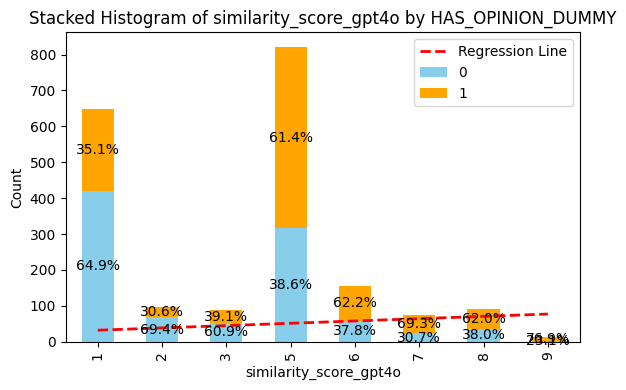

In [98]:
stacked_histogram_with_regression(YTdebatethreads, 'similarity_score_gpt4o', 'HAS_OPINION_DUMMY')

In [ ]:
#the more comments have a political opinion the more similar they are 
#plot shows that the most dissimilar posts are non-political opinion posts, which is not what you would want conceptually, we want to differentiate on opinions not on style etc.
#it could be that the less similar posts are indeed more diverse in non-political opinions, we need manually annotated data to verify this
#also note that each first post in a thread is excluded from this analysis, as it has no preceding post and thus no similarity score

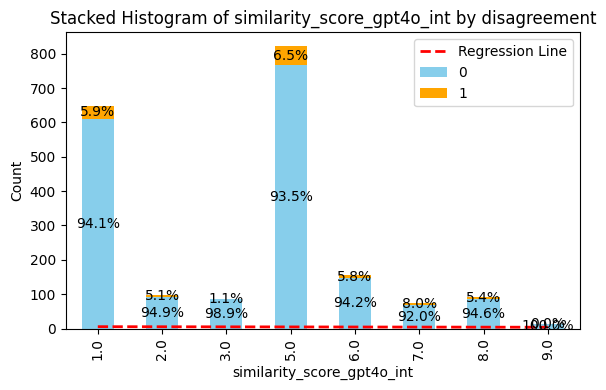

In [99]:
stacked_histogram_with_regression(YTdebatethreads, 'similarity_score_gpt4o_int', 'disagreement')

In [17]:
#plot shows that disagreement was very rarely attributed to a post, making this figure difficult to interpret
#still, the percentage of disagreement is uniform across values of similarity, so again not a very good measure of diversity


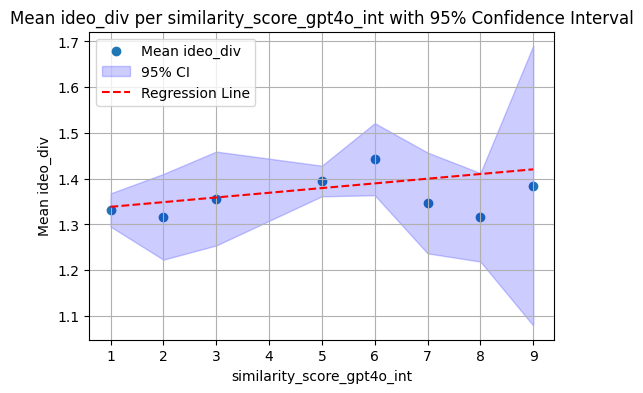

In [244]:
#this graph misses the zero values for ideo_div -> need to check, maybe alter graph type
plot_mean_with_confidence(YTdebatethreads, 'similarity_score_gpt4o_int', 'ideo_div')

In [ ]:
#again no clear relation between similarity and ideo_div, if anything upto a similarity of 6 ideological diversity appears to be increasing, 
# which is not what we want conceptually

In [30]:
YTdebatethreads.columns.to_list()

['StartDate',
 'RecordedDate',
 'IPAddress',
 'Finished',
 'Coder',
 'ID',
 'Mark_ID',
 'Genre',
 'topiccode',
 'Platform',
 'Anonymity',
 'Anonymity_9_TEXT',
 'codable',
 'Interaction',
 'Acknowledgement',
 'TopicRelevance',
 'Reasoning',
 'BackgroundInfo',
 'ExternalEvidence',
 'ExternalEvidence_1_TEXT',
 'Opinion',
 'disagreement',
 'Ideologicaldirection',
 'Name_calling',
 'Vulgarity',
 'Attack_reputation',
 'Question_Intelligenc',
 'All_caps_function',
 'Sarcasm_to_criticize',
 'Individual_right',
 'discrimination',
 'Invoke_violence',
 'Tone',
 'INTERACTIVITY_DUMMY',
 'RATIONALITY_DUMMY',
 'HAS_OPINION_DUMMY',
 'LIBERAL_NEUTRAL_CONSERVATIVE',
 'LIBERAL_DUMMY',
 'CONSERVATIVE_DUMMY',
 'NAMECALLING_DUMMY',
 'VULGAR_DUMMY',
 'NAMECALLING_VULGAR_DUMMY',
 'INCIVILITY_ORDINAL',
 'INCIVILITY_DUMMY',
 'INTOLERANCE_DUMMY',
 'filter_$',
 'IMPOLITENESS_DUMMY',
 'commentText',
 'showName',
 'genre',
 'Time_comment',
 'likeCount_comment',
 'entities',
 'place',
 'retweet_count',
 'platform',


In [18]:
ttestposvars = ['closest_prec_dist_post_ada_embedding',
 'closest_prec_dist_post_exp_gpt4o_ada_embedding', 'claims_gpt4o_count', 'claims_ext_gpt4o_count', 'claim_gpt4o_dum', 'claim_ext_gpt4o_dum', 'closest_prec_dist_most_diverse_claim', 
 'closest_prec_dist_most_diverse_exp_claim', 'ideo_div']
ttestnegvars =['similarity_score_gpt4o_int', 'similarity_score_ext_gpt4o_int', 'similarity_score_gpt4o_most_diverse_claim_int',
 'similarity_score_gpt4o_most_diverse_exp_claim_int', 'similarity_score_polpost_ext_gpt4o_int', 'pol_exp_claim_similarity_score_gpt4o_int']
baselinetvars = ['HAS_OPINION_DUMMY', 'disagreement']

In [25]:
#some descriptives first:
#number of NA's in the data:
print(YTdebatethreads.loc[:, ttestposvars].isna().sum())
print(YTdebatethreads.loc[:, ttestnegvars].isna().sum())

closest_prec_dist_post_ada_embedding               466
closest_prec_dist_post_exp_gpt4o_ada_embedding     466
claims_gpt4o_count                                   0
claims_ext_gpt4o_count                               0
claim_gpt4o_dum                                      0
claim_ext_gpt4o_dum                                  0
closest_prec_dist_most_diverse_claim              1436
closest_prec_dist_most_diverse_exp_claim          1370
ideo_div                                             0
dtype: int64
similarity_score_gpt4o_int                            470
similarity_score_ext_gpt4o_int                        521
similarity_score_gpt4o_most_diverse_claim_int         563
similarity_score_gpt4o_most_diverse_exp_claim_int    1298
similarity_score_polpost_ext_gpt4o_int               1672
pol_exp_claim_similarity_score_gpt4o_int             1757
dtype: int64


In [33]:
pd.set_option('display.max_rows', None)
YTdebatethreads.isna().sum()

StartDate                                               0
RecordedDate                                            0
IPAddress                                               0
Finished                                                0
Coder                                                   0
ID                                                      0
Mark_ID                                                 0
Genre                                                   0
topiccode                                               0
Platform                                                0
Anonymity                                               0
Anonymity_9_TEXT                                        0
codable                                                 0
Interaction                                             0
Acknowledgement                                         0
TopicRelevance                                          0
Reasoning                                               0
BackgroundInfo

In [135]:
ttest_direct(YTdebatethreads, ttestposvars, baselinetvars, tail='less')

baseline                                        HAS_OPINION_DUMMY  \
                                               mean_baseline_is_0   
diversity_metric                                                    
claim_ext_gpt4o_dum                                         0.407   
claim_gpt4o_dum                                             0.361   
claims_ext_gpt4o_count                                      0.889   
claims_gpt4o_count                                          0.779   
closest_prec_dist_most_diverse_claim                        0.658   
closest_prec_dist_most_diverse_exp_claim                    0.619   
closest_prec_dist_post_ada_embedding                        0.689   
closest_prec_dist_post_exp_gpt4o_ada_embedding              0.667   
ideo_div                                                    0.947   

baseline                                                                   \
                                               mean_baseline_is_1 p_value   
diversity_metric                                                            
claim_ext_gpt4o_dum                                         0.818   0.000   
claim_gpt4o_dum                                             0.809   0.000   
claims_ext_gpt4o_count                                      2.467   0.000   
claims_gpt4o_count                                          2.450   0.000   
closest_prec_dist_most_diverse_claim                        0.650   0.969   
closest_prec_dist_most_diverse_exp_claim                    0.642   0.001   
closest_prec_dist_post_ada_embedding                        0.666   1.000   
closest_prec_dist_post_exp_gpt4o_ada_embedding              0.659   0.993   
ideo_div                                                    1.263   0.000   

baseline                                                                \
                                                t_stat n_baseline_is_0   
diversity_metric                                                         
claim_ext_gpt4o_dum                            -23.060          1212.0   
claim_gpt4o_dum                                -25.333          1212.0   
claims_ext_gpt4o_count                         -21.205          1212.0   
claims_gpt4o_count                             -22.354          1212.0   
closest_prec_dist_most_diverse_claim             1.867           303.0   
closest_prec_dist_most_diverse_exp_claim        -3.179           350.0   
closest_prec_dist_post_ada_embedding             9.950           982.0   
closest_prec_dist_post_exp_gpt4o_ada_embedding   2.482           982.0   
ideo_div                                       -11.710          1212.0   

baseline                                                                \
                                               n_baseline_is_1 n_total   
diversity_metric                                                         
claim_ext_gpt4o_dum                                     1249.0  2461.0   
claim_gpt4o_dum                                         1249.0  2461.0   
claims_ext_gpt4o_count                                  1249.0  2461.0   
claims_gpt4o_count                                      1249.0  2461.0   
closest_prec_dist_most_diverse_claim                     722.0  1025.0   
closest_prec_dist_most_diverse_exp_claim                 741.0  1091.0   
closest_prec_dist_post_ada_embedding                    1013.0  1995.0   
closest_prec_dist_post_exp_gpt4o_ada_embedding          1013.0  1995.0   
ideo_div                                                1249.0  2461.0   

baseline                                             disagreement  \
                                               mean_baseline_is_0   
diversity_metric                                                    
claim_ext_gpt4o_dum                                         0.605   
claim_gpt4o_dum                                             0.576   
claims_ext_gpt4o_count                                      1.621   
claims_gpt4o_count                                    

In [13]:
ttest_direct(YTdebatethreads, ttestnegvars, baselinetvars, tail='greater')

C:\Users\sstolwi\AppData\Local\Temp\ipykernel_21272\3838050798.py:145: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(baseline_is_0, baseline_is_1, equal_var=False, alternative='greater')


baseline                                           HAS_OPINION_DUMMY  \
                                                  mean_baseline_is_0   
diversity_metric                                                       
pol_exp_claim_similarity_score_gpt4o_int                         NaN   
similarity_score_ext_gpt4o_int                                 3.895   
similarity_score_gpt4o_int                                     3.190   
similarity_score_gpt4o_most_diverse_claim_int                  4.674   
similarity_score_gpt4o_most_diverse_exp_claim_int              4.084   
similarity_score_polpost_ext_gpt4o_int                           NaN   

baseline                                                                      \
                                                  mean_baseline_is_1 p_value   
diversity_metric                                                               
pol_exp_claim_similarity_score_gpt4o_int                       3.884     NaN   
similarity_score_ext_gpt4o_int                                 4.510   1.000   
similarity_score_gpt4o_int                                     4.350   1.000   
similarity_score_gpt4o_most_diverse_claim_int                  4.082   0.000   
similarity_score_gpt4o_most_diverse_exp_claim_int              4.096   0.532   
similarity_score_polpost_ext_gpt4o_int                         4.800     NaN   

baseline                                                                   \
                                                   t_stat n_baseline_is_0   
diversity_metric                                                            
pol_exp_claim_similarity_score_gpt4o_int              NaN             0.0   
similarity_score_ext_gpt4o_int                     -5.446           947.0   
similarity_score_gpt4o_int                        -11.848           979.0   
similarity_score_gpt4o_most_diverse_claim_int       6.062           854.0   
similarity_score_gpt4o_most_diverse_exp_claim_int  -0.081           381.0   
similarity_score_polpost_ext_gpt4o_int                NaN             0.0   

baseline                                                                   \
                                                  n_baseline_is_1 n_total   
diversity_metric                                                            
pol_exp_claim_similarity_score_gpt4o_int                    704.0   704.0   
similarity_score_ext_gpt4o_int                              993.0  1940.0   
similarity_score_gpt4o_int                                 1012.0  1991.0   
similarity_score_gpt4o_most_diverse_claim_int              1044.0  1898.0   
similarity_score_gpt4o_most_diverse_exp_claim_int           782.0  1163.0   
similarity_score_polpost_ext_gpt4o_int                      789.0   789.0   

baseline                                                disagreement  \
                                                  mean_baseline_is_0   
diversity_metric                                                       
pol_exp_claim_similarity_score_gpt4o_int                       3.912   
similarity_score_ext_gpt4o_int                                 4.216   
similarity_score_gpt4o_int                                     3.774   
similarity_score_gpt4o_most_diverse_claim_int                  4.393   
similarity_score_gpt4o_most_diverse_exp_claim_int              4.098   
similarity_score_polpost_ext_gpt4o_int                         4.816   

baseline                                                                      \
                                                  mean_baseline_is_1 p_value   
diversity_metric                                                               
pol_exp_claim_similarity_score_gpt4o_int                       3.612   0.117   
similarity_score_ext_gpt4o_int                                 4.115   0.319   
similarity_score_gpt4o_int                                     3.863   0.661   
similarity_score_gpt4o_most_diverse_claim_int                  3.675   0.000   
similarity_score_gpt4o_most_diver

In [164]:
YTdebatethreads.ideologicaldirection_trip.value_counts()

ideologicaldirection_trip
Neutral    1584
Left        500
Right       377
Name: count, dtype: int64

In [165]:
pd.crosstab(YTdebatethreads['HAS_OPINION_DUMMY'], YTdebatethreads['ideologicaldirection_trip'],dropna=False,margins=True)

ideologicaldirection_trip,Left,Neutral,Right,All
HAS_OPINION_DUMMY,,,,
0,0,1212,0,1212
1,500,372,377,1249
All,500,1584,377,2461


In [197]:
###political opinion:
#political opinion posts are closer to their most similar post in embedding distance and have a higher similarity score compared to non-political opinion posts
#all of which is NOT conceptually what we want, we want political opinion posts to be more diverse in opinion, not more similar in style
#for ideo_div the effect is in the expected direction, which is to be expected since all non-political opinion posts are in the majority category of neutral -> definitions overlap 
#ALL simpler claim counts do have a significant effect in the expected direction with more claims for posts that have an opinion, and those that show disagreement

###disagreement:
#both ada embedding vars are related to disagreement in the expected direction, and closest_prec_dist_post_exp_gpt4o_ada_embedding is even nearly 0.051 significantly related, but substantial differences are very small
#the similarity score of the expanded posts is also in related to disagreement in the expected direction, but not significantly
#even within topic and among political posts the similarity score is not significantly related to disagreement, although the effect is moving in the expected direction, so this could be a sample size issue


C:\Users\sstolwi\AppData\Local\Temp\ipykernel_21612\3510604493.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bins'] = pd.qcut(data[embedding_distance], 25, labels=False)


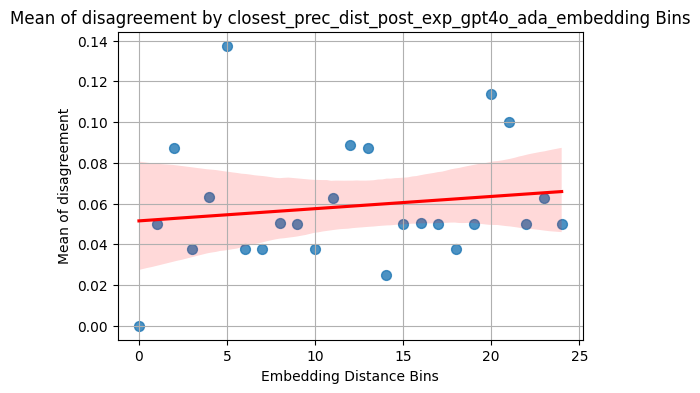

In [230]:
#let's plot:
plot_share_increase_with_regression(YTdebatethreads, 'disagreement', 'closest_prec_dist_post_exp_gpt4o_ada_embedding')

In [ ]:
#now look at relations between ideo_div as baseline and the other diversity measures:

In [166]:
calculate_correlations(YTdebatethreads, 'ideo_div', ttestposvars)

,Variable,n,Correlation,P-value
0,closest_prec_dist_post_ada_embedding,1995,-0.006806,0.761271
1,closest_prec_dist_post_exp_gpt4o_ada_embedding,1995,0.030453,0.173944
2,claims_gpt4o_count,2461,0.105748,0.0
3,claims_ext_gpt4o_count,2461,0.11198,0.0
4,claim_gpt4o_dum,2461,0.100292,0.000001
5,claim_ext_gpt4o_dum,2461,0.116999,0.0
6,closest_prec_dist_most_diverse_claim,1025,0.004527,0.884904
7,closest_prec_dist_most_diverse_exp_claim,1091,0.053503,0.077318
8,ideo_div,2461,"[1.0, 1.0]","[0.0, 0.0]"


In [66]:
calculate_correlations(YTdebatethreads, 'ideo_div', ttestnegvars)

,Variable,n,Correlation,P-value
0,similarity_score_gpt4o_int,1991,0.048013,0.032173
1,similarity_score_ext_gpt4o_int,1940,0.008493,0.708512
2,similarity_score_gpt4o_most_diverse_claim_int,1898,-0.014780,0.519894
3,similarity_score_gpt4o_most_diverse_exp_claim_int,1940,0.008493,0.708512
4,similarity_score_polpost_ext_gpt4o_int,789,-0.041849,0.240337
5,pol_exp_claim_similarity_score_gpt4o_int,704,-0.013509,0.720482


In [39]:
#only similarity score of raw posts is significantly correlated with ideo_div, but positively so post that increase diversity ideologically are more similar to the most similar post in the thread
#this is not what we want conceptually
#the claim counts again do siginificantly correlate with ideo_div, and in the expected direction
#among within topic polposts the similarity score of the expanded posts is not related to ideo_div, and also in the wrong direction

In [168]:
#what is we focus on political posts only?
ttest_direct(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], ttestposvars, ['disagreement'], tail='less')

baseline                                             disagreement  \
                                               mean_baseline_is_0   
diversity_metric                                                    
claim_ext_gpt4o_dum                                         0.810   
claim_gpt4o_dum                                             0.798   
claims_ext_gpt4o_count                                      2.376   
claims_gpt4o_count                                          2.349   
closest_prec_dist_most_diverse_claim                        0.649   
closest_prec_dist_most_diverse_exp_claim                    0.640   
closest_prec_dist_post_ada_embedding                        0.666   
closest_prec_dist_post_exp_gpt4o_ada_embedding              0.658   
ideo_div                                                    1.257   

baseline                                                                   \
                                               mean_baseline_is_1 p_value   
diversity_metric                                                            
claim_ext_gpt4o_dum                                         0.904   0.002   
claim_gpt4o_dum                                             0.933   0.000   
claims_ext_gpt4o_count                                      3.462   0.000   
claims_gpt4o_count                                          3.558   0.000   
closest_prec_dist_most_diverse_claim                        0.659   0.066   
closest_prec_dist_most_diverse_exp_claim                    0.659   0.005   
closest_prec_dist_post_ada_embedding                        0.670   0.239   
closest_prec_dist_post_exp_gpt4o_ada_embedding              0.667   0.078   
ideo_div                                                    1.327   0.176   

baseline                                                               \
                                               t_stat n_baseline_is_0   
diversity_metric                                                        
claim_ext_gpt4o_dum                            -2.985          1145.0   
claim_gpt4o_dum                                -4.908          1145.0   
claims_ext_gpt4o_count                         -3.781          1145.0   
claims_gpt4o_count                             -4.126          1145.0   
closest_prec_dist_most_diverse_claim           -1.521           648.0   
closest_prec_dist_most_diverse_exp_claim       -2.615           668.0   
closest_prec_dist_post_ada_embedding           -0.713           925.0   
closest_prec_dist_post_exp_gpt4o_ada_embedding -1.427           925.0   
ideo_div                                       -0.935          1145.0   

baseline                                                                
                                               n_baseline_is_1 n_total  
diversity_metric                                                        
claim_ext_gpt4o_dum                                      104.0  1249.0  
claim_gpt4o_dum                                          104.0  1249.0  
claims_ext_gpt4o_count                                   104.0  1249.0  
claims_gpt4o_count                                       104.0  1249.0  
closest_prec_dist_most_diverse_claim                      74.0   722.0  
closest_prec_dist_most_diverse_exp_claim                  73.0   741.0  
closest_prec_dist_post_ada_embedding                      88.0  1013.0  
closest_prec_dist_post_exp_gpt4o_ada_embedding            88.0  1013.0  
ideo_div                                                 104.0  1249.0

In [170]:
ttest_direct(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], ttestnegvars, ['disagreement'], tail='greater')

baseline                                                disagreement  \
                                                  mean_baseline_is_0   
diversity_metric                                                       
similarity_score_ext_gpt4o_int                                 4.542   
similarity_score_gpt4o_int                                     4.369   
similarity_score_gpt4o_most_diverse_claim_int                  4.139   
similarity_score_gpt4o_most_diverse_exp_claim_int              4.542   

baseline                                                                      \
                                                  mean_baseline_is_1 p_value   
diversity_metric                                                               
similarity_score_ext_gpt4o_int                                 4.165   0.065   
similarity_score_gpt4o_int                                     4.148   0.181   
similarity_score_gpt4o_most_diverse_claim_int                  3.466   0.003   
similarity_score_gpt4o_most_diverse_exp_claim_int              4.165   0.065   

baseline                                                                  \
                                                  t_stat n_baseline_is_0   
diversity_metric                                                           
similarity_score_ext_gpt4o_int                     1.529           908.0   
similarity_score_gpt4o_int                         0.914           924.0   
similarity_score_gpt4o_most_diverse_claim_int      2.766           956.0   
similarity_score_gpt4o_most_diverse_exp_claim_int  1.529           908.0   

baseline                                                                   
                                                  n_baseline_is_1 n_total  
diversity_metric                                                           
similarity_score_ext_gpt4o_int                               85.0   993.0  
similarity_score_gpt4o_int                                   88.0  1012.0  
similarity_score_gpt4o_most_diverse_claim_int                88.0  1044.0  
similarity_score_gpt4o_most_diverse_exp_claim_int            85.0   993.0

In [171]:
calculate_correlations(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], 'ideo_div', ttestposvars)

,Variable,n,Correlation,P-value
0,closest_prec_dist_post_ada_embedding,1013,0.075583,0.016124
1,closest_prec_dist_post_exp_gpt4o_ada_embedding,1013,0.085739,0.006323
2,claims_gpt4o_count,1249,0.012017,0.671365
3,claims_ext_gpt4o_count,1249,0.010926,0.699675
4,claim_gpt4o_dum,1249,-0.020221,0.475234
5,claim_ext_gpt4o_dum,1249,-0.00381,0.892984
6,closest_prec_dist_most_diverse_claim,722,0.003264,0.930224
7,closest_prec_dist_most_diverse_exp_claim,741,0.036198,0.325103
8,ideo_div,1249,"[1.0, 1.0]","[0.0, 0.0]"


In [172]:
calculate_correlations(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], 'ideo_div', ttestnegvars)

,Variable,n,Correlation,P-value
0,similarity_score_gpt4o_int,1012,-0.06649,0.034438
1,similarity_score_ext_gpt4o_int,993,-0.07471,0.018544
2,similarity_score_gpt4o_most_diverse_claim_int,1044,0.00086,0.977870
3,similarity_score_gpt4o_most_diverse_exp_claim_int,993,-0.07471,0.018544


In [ ]:
#now we find significant results for:
#closest_prec_dist_post_exp_gpt4o_ada_embedding on disagreement (marginal and small effect)
#both claim counts on disagreement
#ideo_div on both embedding vars and similarity scores in expected direction, with slightly stronger effects for the expanded posts and embeddings
#but the effect of claim count now disappears -> might have been driven by the absence of claims in some posts which are also non-political
#or the number of claims says little about their diversity with respect to previous claims, but more about their diversity with respect to the absence of claims


In [323]:
#let's look at mean number of claim for political and non-political posts and the number of posts without a claim:
print(YTdebatethreads.groupby('HAS_OPINION_DUMMY').claims_gpt4o_count.mean())
print(YTdebatethreads.groupby('HAS_OPINION_DUMMY')['claims_gpt4o_count'].apply(lambda x: (x==0).sum()))
print(YTdebatethreads.groupby('disagreement').claims_gpt4o_count.mean())
print(YTdebatethreads.groupby('disagreement').claim_gpt4o_dum.mean())

HAS_OPINION_DUMMY
0    0.819756
1    2.471866
Name: claims_gpt4o_count, dtype: float64
HAS_OPINION_DUMMY
0    616
1    195
Name: claims_gpt4o_count, dtype: int64
disagreement
0    1.581470
1    2.897436
Name: claims_gpt4o_count, dtype: float64
disagreement
0    0.580937
1    0.794872
Name: claim_gpt4o_dum, dtype: float64


In [ ]:
#indeed many more non-political posts have no claims, which might explain the effect of claim count ideo_div
#more disagreeing posts have claims, and they have more claims, but still many non-disagreeing posts have claims (60%) and making a claim seems not a necessary precondition for disagreement so this is not the whole effect, and the effect appears valid

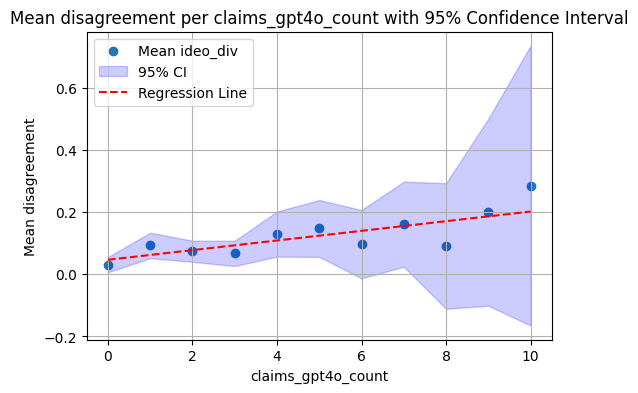

In [327]:
plot_mean_with_confidence(YTdebatethreads.loc[(YTdebatethreads.HAS_OPINION_DUMMY==1)&(YTdebatethreads.claims_gpt4o_count<11),:], 'claims_gpt4o_count', 'disagreement')

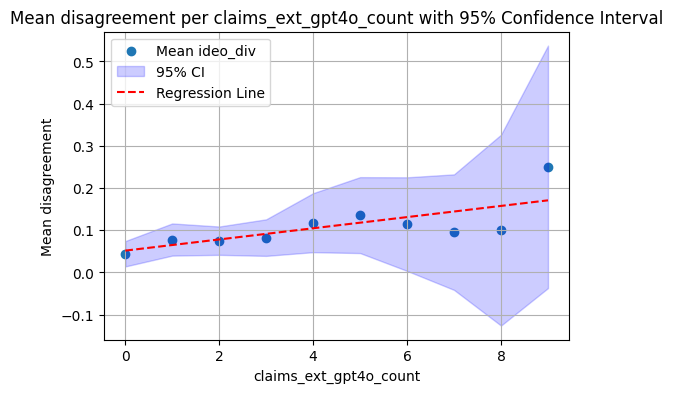

In [329]:
plot_mean_with_confidence(YTdebatethreads.loc[(YTdebatethreads.HAS_OPINION_DUMMY==1)&(YTdebatethreads.claims_ext_gpt4o_count<10),:], 'claims_ext_gpt4o_count', 'disagreement')

In [ ]:
#apperently post with claims are more disagreeing than those without, but also those with more claims are more often disagreeing than those with fewer claims

C:\Users\sstolwi\AppData\Local\Temp\ipykernel_21612\161367270.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bins'] = pd.qcut(data[embedding_distance], 25, labels=False)


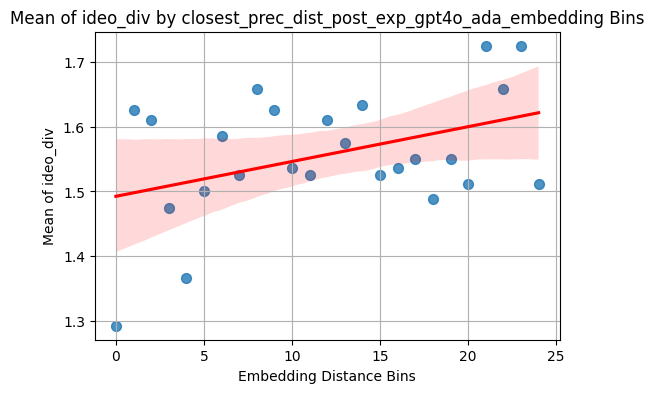

In [238]:
plot_share_increase_with_regression(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:],  'ideo_div', 'closest_prec_dist_post_exp_gpt4o_ada_embedding')

C:\Users\sstolwi\AppData\Local\Temp\ipykernel_21612\161367270.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bins'] = pd.qcut(data[embedding_distance], 25, labels=False)


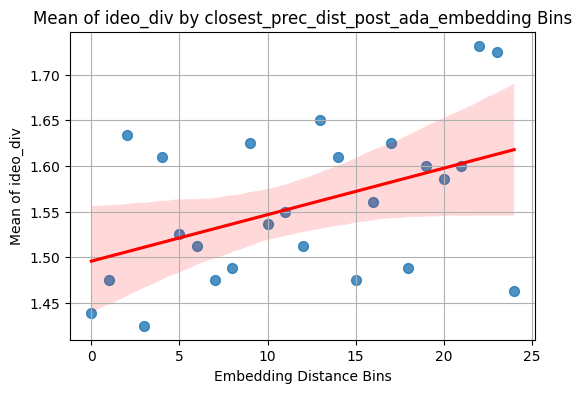

In [237]:
#let's plot:
plot_share_increase_with_regression(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:],  'ideo_div', 'closest_prec_dist_post_ada_embedding')

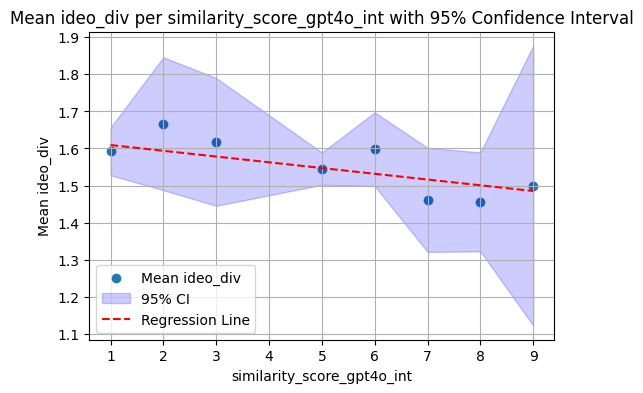

In [245]:
plot_mean_with_confidence(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], 'similarity_score_gpt4o_int', 'ideo_div')

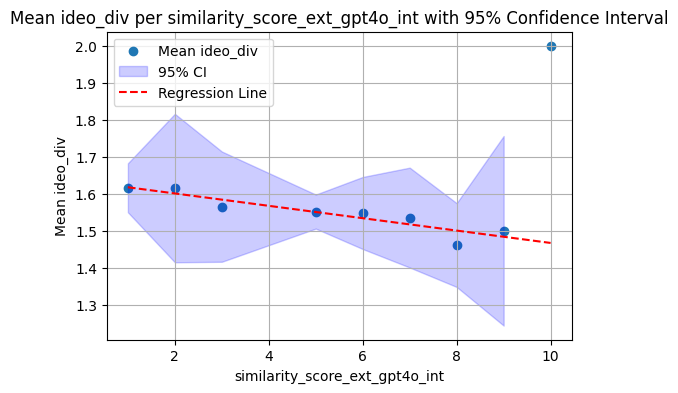

In [246]:
plot_mean_with_confidence(YTdebatethreads.loc[YTdebatethreads.HAS_OPINION_DUMMY==1,:], 'similarity_score_ext_gpt4o_int', 'ideo_div')

In [ ]:
#looks pretty neat!
#still effect of embeddings shows a large variance, not much of an effect in the middle range


In [174]:
YTdebatethreads.topiccode.value_counts()

topiccode
1    773
3    771
2    748
0    169
Name: count, dtype: int64

In [ ]:
# topicdict = {0 : 'YTgen', 
# 1 : 'YT_investigation',
# 2 : 'YT_Econ',
# 3 : 'YT_ME',
# 4 : 'Twitgen'}

In [178]:
#to correctly test effect of constraining topic or political post, we should also only look at distances versus other political posts, or post by the same topic 
# -> filter those posts before calculating (prompting) the similarity scores... not feasible
#for embeddings calculating these distances is feasible much easier

In [41]:
#save data:
YT_claim_embeds.to_parquet(f'{CFG.report_dir}/pubsphere_YT_posts_closest_preceding_distance.parquet')
YTdebatethreads.to_parquet(f'{CFG.report_dir}/pubsphere_YT_debate_threads.parquet')
YT_claim_embeds_exp_explode.to_parquet(f'{CFG.report_dir}/pubsphere_YT_post_claim_exp_explode.parquet')
YT_claim_embeds_explode.to_parquet(f'{CFG.report_dir}/pubsphere_YT_post_claim_explode.parquet')
